In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import re

# Banco de Preguntas

In [0]:
preguntas = [
    '¿Qué es un lenguaje de programación?',
    '¿Qué es una función?',
    '¿Cómo hago un bucle?',
    '¿Cómo creo una clase?',
    '¿Cómo creo una interfaz de usuario?',
    '¿Qué es un objeto en programación?',
    '¿Cuál es la finalidad del compilador?',
    '¿Cómo declaro una variable?',
    '¿Cómo envío una tarea?'
]

def graficar(diccionario):
  rango = range(len(diccionario.values()))
  plt.figure(figsize=(25, 3))
  plt.bar(rango, diccionario.values(), width=0.4)
  plt.xticks(rango, diccionario.keys())
  plt.ylim([0, 1])
  plt.show()

# Tratamiento

In [0]:
def limpiar(sentencia):
  documento = re.sub('(\?|¿)', '', sentencia.lower())
  # documento = ' '.join([palabra for palabra in documento.split() if palabra not in ['qué','cómo','cuál','es','de','un','una','la','del', 'en']])
  return documento

def vocabulario(documentos):
  vocabulario = list(set([palabra for documento in documentos for palabra in documento.split()]))
  return vocabulario

documentos = [limpiar(sentencia) for sentencia in preguntas]
vocabulario = vocabulario(documentos)

documentos, vocabulario

(['qué es un lenguaje de programación',
  'qué es una función',
  'cómo hago un bucle',
  'cómo creo una clase',
  'cómo creo una interfaz de usuario',
  'qué es un objeto en programación',
  'cuál es la finalidad del compilador',
  'cómo declaro una variable',
  'cómo envío una tarea'],
 ['una',
  'del',
  'hago',
  'declaro',
  'tarea',
  'usuario',
  'creo',
  'lenguaje',
  'finalidad',
  'qué',
  'interfaz',
  'cuál',
  'función',
  'un',
  'de',
  'es',
  'clase',
  'compilador',
  'programación',
  'la',
  'envío',
  'cómo',
  'bucle',
  'variable',
  'en',
  'objeto'])

In [0]:
def documento_a_vector(documento, vocabulario):
  vector = {palabra:0 for palabra in vocabulario}
  for palabra in documento.split():
    if palabra in vocabulario:
      vector[palabra] += 1
  return vector

documento_a_vector('qué es una variable', vocabulario)

{'bucle': 0,
 'clase': 0,
 'compilador': 0,
 'creo': 0,
 'cuál': 0,
 'cómo': 0,
 'de': 0,
 'declaro': 0,
 'del': 0,
 'en': 0,
 'envío': 0,
 'es': 1,
 'finalidad': 0,
 'función': 0,
 'hago': 0,
 'interfaz': 0,
 'la': 0,
 'lenguaje': 0,
 'objeto': 0,
 'programación': 0,
 'qué': 1,
 'tarea': 0,
 'un': 0,
 'una': 1,
 'usuario': 0,
 'variable': 1}

# TF

\begin{equation*}
TF(t) = \frac{\text{numero de apariciones del termino 't' en el documento}}{\text{numero total de terminos en el documento}}
\end{equation*}

[0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0]


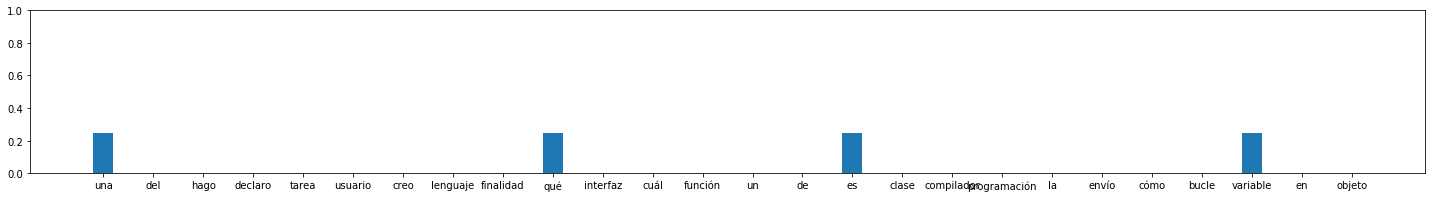

In [0]:
def TF(documento, vocabulario):
  vector = documento_a_vector(documento, vocabulario)
  tf = {palabra: num_apariciones/len(documento.split()) for palabra, num_apariciones in vector.items()} # TF
  return tf

tf = TF('qué es una variable', vocabulario)
print([*tf.values()])
graficar(tf)

# IDF
\begin{equation*}
IDF(t) = \log(\frac{\text{numero total de documentos}}{\text{numero de documentos donde aparece el termino 't'}})
\end{equation*}

[0.25527250510330607, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249, 0.6532125137753437, 0.9542425094393249, 0.9542425094393249, 0.47712125471966244, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249, 0.47712125471966244, 0.6532125137753437, 0.3521825181113625, 0.9542425094393249, 0.9542425094393249, 0.6532125137753437, 0.9542425094393249, 0.9542425094393249, 0.25527250510330607, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249, 0.9542425094393249]


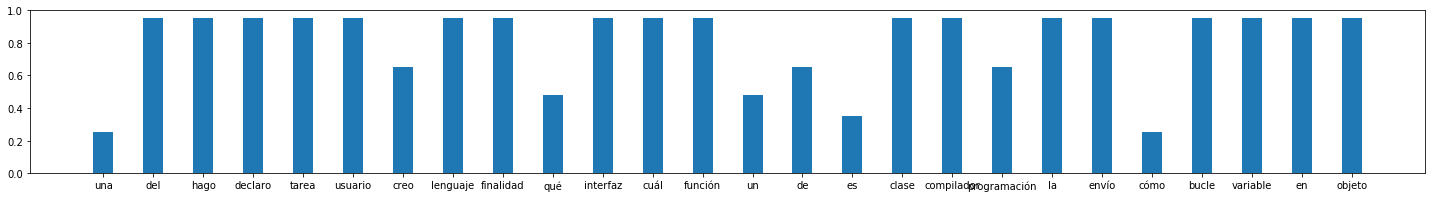

In [0]:
def IDF(documentos, vocabulario):
  idf = {}
  for palabra in vocabulario:
    num_apariciones = 0
    for documento in documentos:
      if palabra in documento.split():
        num_apariciones += 1
    idf[palabra] = np.log10(len(documentos)/num_apariciones) # IDF
  return idf

idf = IDF(documentos, vocabulario)
print([*idf.values()])
graficar(idf)

# TF*IDF

[0.06381812627582652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11928031367991561, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08804562952784062, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23856062735983122, 0.0, 0.0]


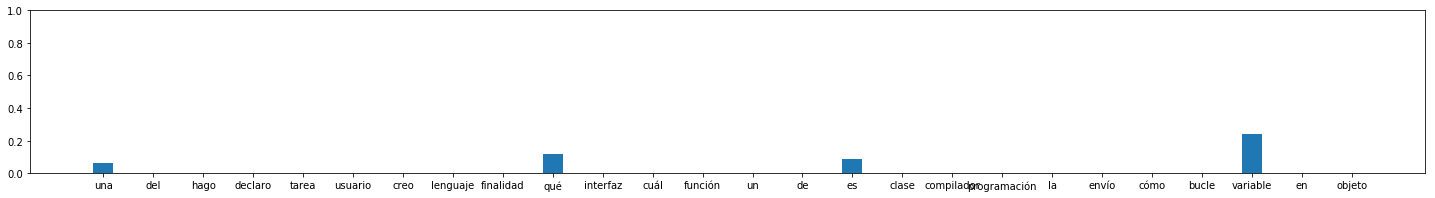

In [0]:
def TF_IDF(documento, documentos, vocabulario):
  tf = TF(documento, vocabulario)
  idf = IDF(documentos, vocabulario)
  tf_idf = {palabra: tf[palabra]*idf[palabra] for palabra in vocabulario} # TF*IDF
  return tf_idf

tf_idf = TF_IDF('qué es una variable', documentos, vocabulario)
print([*tf_idf.values()])
graficar(tf_idf)

# Similitud de Coseno
\begin{equation*}
\cos(θ) = \frac{A⋅B}{\|A\|\|B\|}
\end{equation*}

In [0]:
def similitud_de_coseno(documento_1, documento_2, documentos, vocabulario):
  tf_idf_1 = TF_IDF(documento_1, documentos, vocabulario)
  tf_idf_2 = TF_IDF(documento_2, documentos, vocabulario)
  
  vector_1 = np.array([*tf_idf_1.values()])
  vector_2 = np.array([*tf_idf_2.values()])
  cos = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2)) # cos
  return cos
  
cos = similitud_de_coseno('qué es una variable', 'cómo declaro una variable', documentos, vocabulario)
cos

0.6062454604277434

In [0]:
entrada_usuario = 'qué es una variable'

celdas = [similitud_de_coseno(entrada_usuario, documento, documentos, vocabulario) for documento in documentos]
tabla = pd.DataFrame(celdas, documentos, ['Similitud de Coseno'])
tabla

,Similitud de Coseno
qué es un lenguaje de programación,0.199402
qué es una función,0.314024
cómo hago un bucle,0.000000
cómo creo una clase,0.046688
cómo creo una interfaz de usuario,0.033771
qué es un objeto en programación,0.181537
cuál es la finalidad del compilador,0.049780
cómo declaro una variable,0.606245
cómo envío una tarea,0.040488
